# Домашнее задание 

# 1. Теория (6 баллов)

### Сеть $G(t)$ образуется присоединением к центральному узлу $t$ треугольников - см. рисунок.

![граф](HW_1.png)

### Пусть всего в сети $n$ вершин, $n=2t+1$.

## Задание №1: Определите средний коэффициент кластеризации вершин в сети $\overline{C}$  как функцию $n$. Чему равен предел при $n \to \infty$?

## Решение:

Средний коэффициент кластеризации $\bar{C}$ измеряет, насколько вершины в сети склонны создавать треугольники. Локальный коэффициент для вершины $i$, с степенью $k_i$, основан на соотношении реальных и возможных связей между её соседями, максимум $\frac{k_i(k_i - 1)}{2}$.

Для центральной вершины, получающей 2 связи от каждого треугольника, степень равна $2t$. Так как эти связи не образуют дополнительные треугольники между соседями, кроме тех, что включены в один треугольник, её локальный коэффициент:

$\bar{C}_{центр} = \frac{1}{2t - 1}$.

Для вершин на концах, каждая со степенью 2 и одной связью к другой вершине, локальный коэффициент кластеризации равен 1:

$\bar{C}_{верш_i} = 1$.

Всего таких вершин в сети 2t.

Переводя это в функцию от $n$, где $n = 2t + 1$, $ t = \frac{n-1}{2}$:

$\bar{C} = \frac{1}{n}\left(\frac{1}{2t - 1} + 2t\right)$

$\bar{C} = \frac{1}{n}\left(\frac{1}{n-2} + n-1\right)$,

$\bar{C} = \frac{1}{n(n-2)} + \frac{n}{n} - \frac{1}{n} = \frac{1}{n(n-2)} + 1 - \frac{1}{n}$.

Так как у обеих дробей в финальном выражении степени $n$ в знаменателе больше чем в числителе, то при устремлении $n$ к бесконечности, $\bar{C}$ асимптотически приближается к 1:

$\lim_{n \to \infty} \bar{C} = 1$.

## Задание №2: Определите транзитивность  $T$ в зависимости от числа вершин $n$. Чему равен предел при $n \to \infty$?

## Решение:

Транзитивность в сети — это мера, которая показывает, насколько часто пары вершин, связанные с общим соседом, также связаны друг с другом. Транзитивность $ T $ в сети измеряется через отношение тройки соединений к потенциально возможным тройкам, определяемым степенями вершин. С каждым добавленным треугольником, степень центра увеличивается на 2, и появляются две новые вершины со степенью 2.

В сети с $ n = 2t + 1 $ вершинами:
- Центр имеет степень $ 2t $.
- Есть $ 2t $ нецентральных вершин со степенью 2.

Суммируя $ k_i(k_i - 1) / 2 $ для всех вершин, для центра получается $ t(2t - 1) $, а для каждой периферийной — по единице, в сумме $ 2t $. Тогда общая сумма равна $ t(2t - 1) + 2t = 2t^2 +t$.

Транзитивность, как отношение утроенного количества треугольников к этой сумме, вычисляется как:

$ T = \frac{6t}{2t^2 + t} = \frac{6}{2t + 1} $

Учитывая, что $t = \frac{n-1}{2}$:

$ T(n) = \frac{6}{n} $

При устремлении $ n $ к бесконечности, $ T(n) $ стремится к нулю:

$ \lim_{n \to \infty} T(n) = 0 $.

# 2. Анализ данных (22 балла)

## Задание:

### Выберите данные [здесь](https://networkrepository.com/networks.php) или [здесь](https://snap.stanford.edu/data/). Выведите число вершин, число ребер и плотность сети.

[Выбранная сеть](https://snap.stanford.edu/data/ca-GrQc.html)

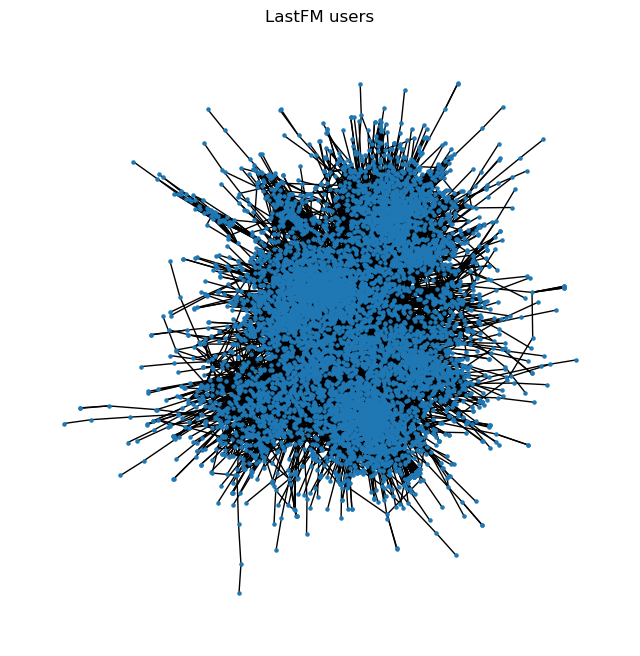

Число вершин: 7624
Число ребер: 27806
Плотность сети: 0.0009568849118596328


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('lasftm_asia/lastfm_asia_edges.csv')
G = nx.Graph()
G.add_edges_from(df.values)

plt.figure(figsize=(8, 8))
plt.title('LastFM users')
nx.draw(G, node_size=5)
plt.show()

# Число вершин
num_nodes = G.number_of_nodes()

# Число ребер
num_edges = G.number_of_edges()

# Плотность сети
density = nx.density(G)

print(f'Число вершин: {num_nodes}')
print(f'Число ребер: {num_edges}')
print(f'Плотность сети: {density}')

## Основные структурные свойства ( 5 баллов)

## Задание №1:

### (2 балла)  Постройте распределение коэффициента кластеризации, какие значения он преимущественно принимает? Сколько вершин имеют нулевую кластеризацию, сколько единичную?

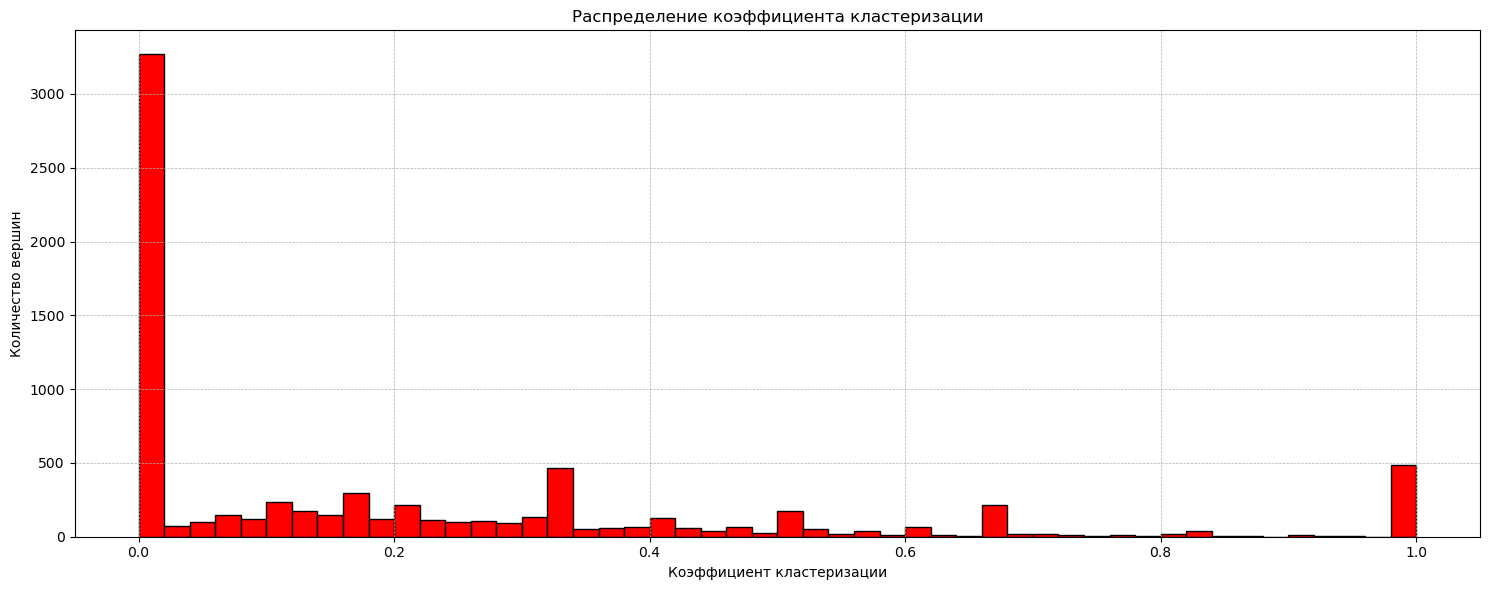

Три преимущественно принимаемых коэффициентом кластеризации значения:
Значение: 0, Частота: 3249
Значение: 1.0, Частота: 483
Значение: 0.3333333333333333, Частота: 407

Количество вершин с нулевой кластеризацией: 3249
Количество вершин с единичной кластеризацией: 483


In [8]:
from collections import Counter

#Список коэффициентов кластеризации для каждого узла
clustering_coeffs = list(nx.clustering(G).values())

# Количество вершин с нулевой кластеризацией
sum_zero_clustering = sum(1 for x in clustering_coeffs if x == 0)
# Количество вершин с единичной кластеризацией
sum_unit_clustering = sum(1 for x in clustering_coeffs if x == 1)

plt.figure(figsize=(15, 6))
plt.hist(clustering_coeffs, bins=50, color='red', edgecolor='black')
plt.title('Распределение коэффициента кластеризации')
plt.xlabel('Коэффициент кластеризации')
plt.ylabel('Количество вершин')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

k = Counter(clustering_coeffs)
most_common_values = k.most_common(3)
print("Три преимущественно принимаемых коэффициентом кластеризации значения:")
for value, count in most_common_values:
    print(f"Значение: {value}, Частота: {count}")

print(f"\nКоличество вершин с нулевой кластеризацией: {sum_zero_clustering}")
print(f"Количество вершин с единичной кластеризацией: {sum_unit_clustering}")

## Задание №2:

### (1 балл) Вычислите коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин;

In [11]:
from scipy.stats import pearsonr

#Список степеней вершин
degrees = [degree for _, degree in G.degree()]

#Коэффициент корреляции Пирсона
corr_coefficient, _ = pearsonr(degrees, clustering_coeffs)

print("Коэффициент корреляции Пирсона:", corr_coefficient)

Коэффициент корреляции Пирсона: 0.042086479730307005


## Задание №3:

### (2 балла) Определите число компонет связности и постройте распределение размера компонент связности (удалите из массива максимальную компоненту для наглядности;

In [39]:
connected_components = nx.number_connected_components(G)
print('Число компонент связности:', connected_components)

Число компонент связности: 1


#### Видно, что в графе всего одна компонента связности, что значит, что он связный и из него можно не удалять максимальную компоненту, так как она единственная.

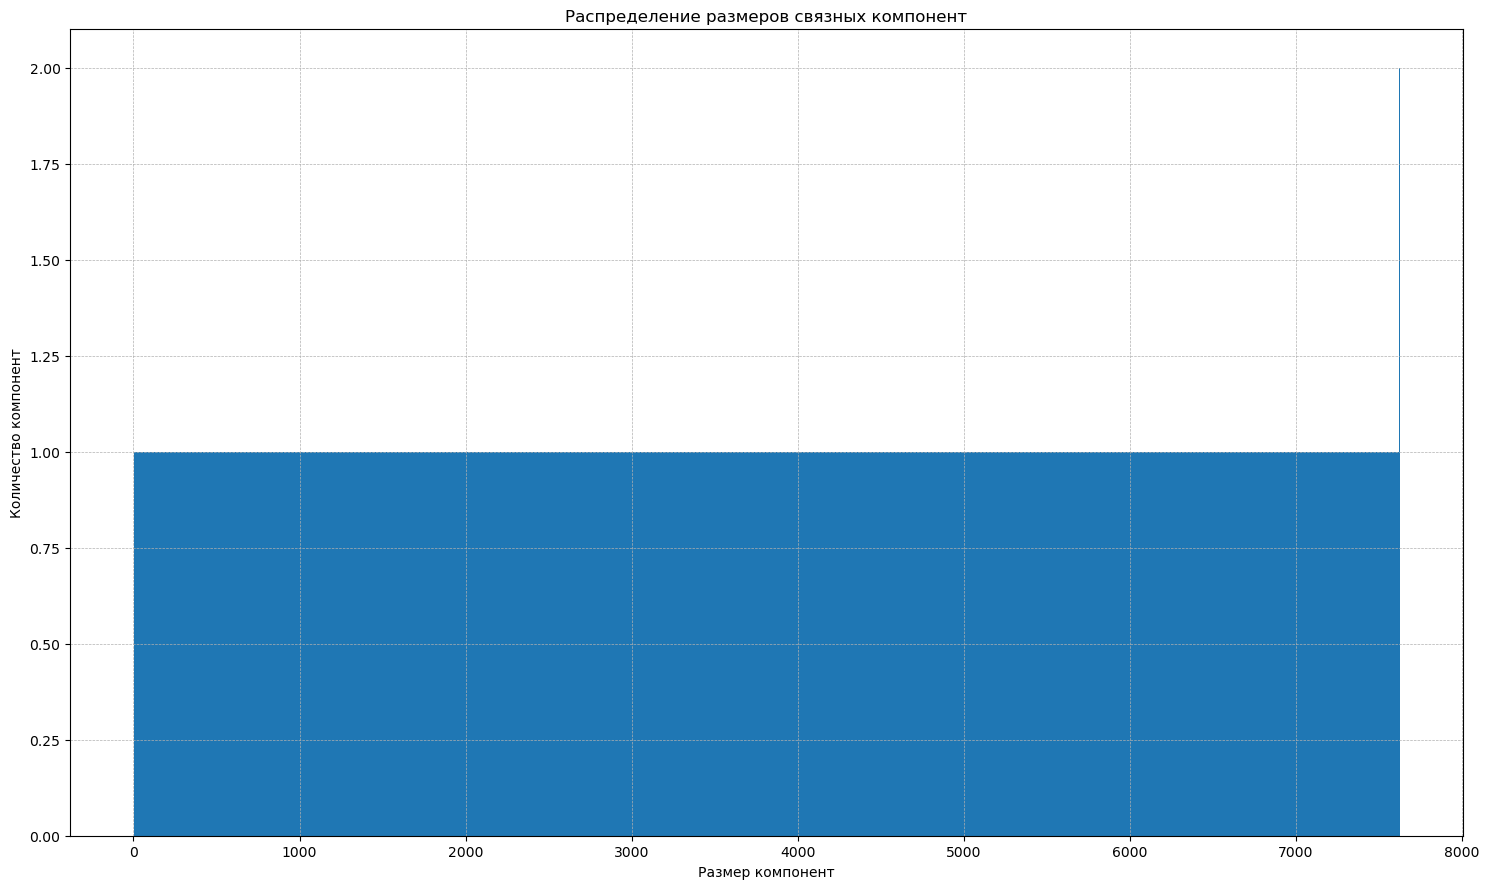

In [50]:
component_sizes = [i for i in sorted(nx.connected_components(G), reverse=True)]
component_sizes = sorted(component_sizes[0], reverse=True)

plt.figure(figsize=(15, 9))
plt.hist(component_sizes, bins = range(1, max(component_sizes) + 1))
plt.title('Распределение размеров связных компонент')
plt.xlabel('Размер компонент')
plt.ylabel('Количество компонент')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

## Распределение степеней и корреляция ( 10 баллов)

## Задание №1:

### (3 балла) Для выбранной сети постройте распределение степеней, определите, подчиняется ли распределение степенному закону, оцените параметры распределения.

Calculating best minimal value for power law fit


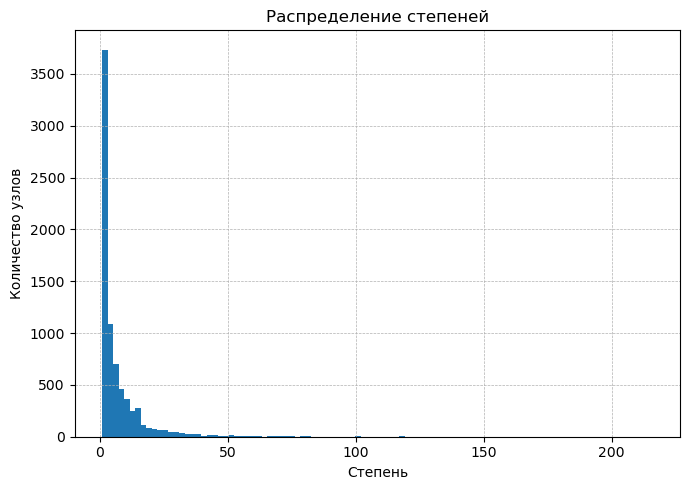

In [56]:
import powerlaw
from powerlaw import Fit

sorted_degrees = [degree for _, degree in sorted(G.degree(), key=lambda x: x[1], reverse=True)]

fit = powerlaw.Fit(sorted_degrees)
alpha = fit.alpha  # Значение параметра распределения
xmin = fit.xmin  # Минимальное значение x, с которого начинается степенное распределение

# Сравниваем распределение степеней с экспоненциальным распределением
R, p = fit.distribution_compare('power_law', 'exponential')

# Создаем график распределения степеней
plt.figure(figsize=(7, 5))
plt.hist(sorted_degrees, bins=100)  # Используем 100 корзин для гистограммы
plt.title('Распределение степеней')
plt.xlabel('Степень')
plt.ylabel('Количество узлов')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Автоматически корректируем подложку графика
plt.show()

### Оценка соответствия степенному закону

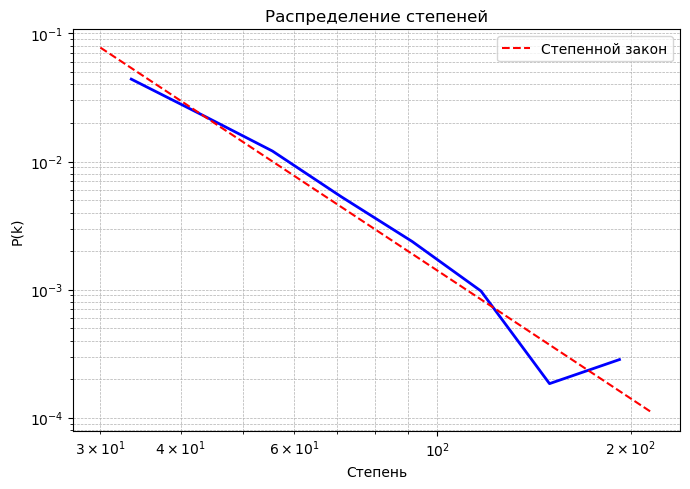

In [57]:
import matplotlib.pyplot as plt

# Создаем график для оценки соответствия степенному распределению
plt.figure(figsize=(7, 5))

# PDF исходного распределения
fit.plot_pdf(color='b', linewidth=2)

# PDF степенного закона для сравнения
fit.power_law.plot_pdf(color='r', linestyle='--', label='Степенной закон')

plt.title('Распределение степеней')
plt.xlabel('Степень') 
plt.ylabel('P(k)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout() 

plt.show() 

### Параметры распределния

In [60]:
print("Показатель степени (alpha):", alpha)
print("Минимальное значение для оценки степени (xmin):", xmin)
print("Результат теста сравнения распределений (R, p):", R, p)

Показатель степени (alpha): 3.326316680717257
Минимальное значение для оценки степени (xmin): 30.0
Результат теста сравнения распределений (R, p): 9.39555416668346 0.14458753503170957


## Задание №2:

### (1 балл) Определите коэффициент ассортативности сети.

In [61]:
assortativity_coefficient = nx.degree_assortativity_coefficient(G)
print(f"Коэффициент ассортативности сети: {assortativity_coefficient}")

Коэффициент ассортативности сети: 0.01707317256063152


## Задание №3:

### (2 балла) Постройте функцию корреляции степеней. Для этого для каждого значения степени $k$ определите  среднее значение средней степени ближайших соседей вершин.

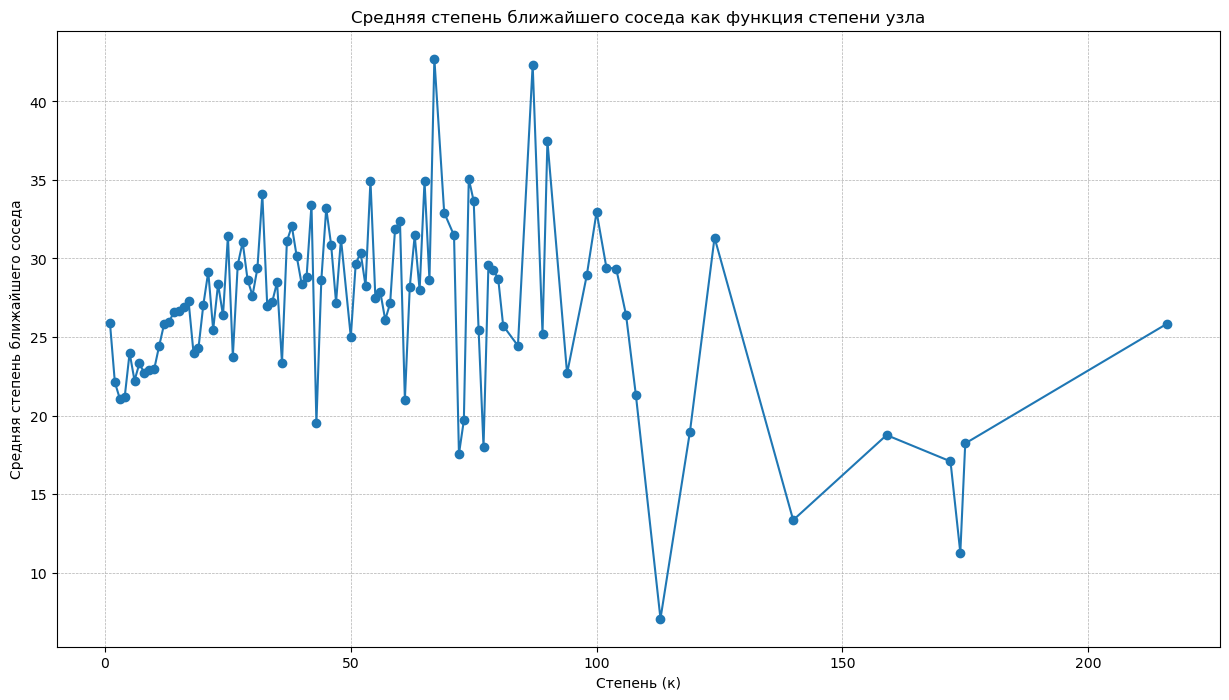

In [63]:
knn = nx.average_neighbor_degree(G)
knn_df = pd.DataFrame(list(G.degree()), columns=['node', 'degree'])
knn_df['avg_knn_degree'] = knn_df['node'].map(knn)
avg_knn_by_degree = knn_df.groupby('degree')['avg_knn_degree'].mean()

plt.figure(figsize=(15, 8))
plt.plot(avg_knn_by_degree.index, avg_knn_by_degree.values, 'o-')
plt.title('Средняя степень ближайшего соседа как функция степени узла')
plt.xlabel('Степень (к)')
plt.ylabel('Средняя степень ближайшего соседа')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## Задание №4:

### (2 балл) Постройте зависимость коэффициента Rich Club от k.

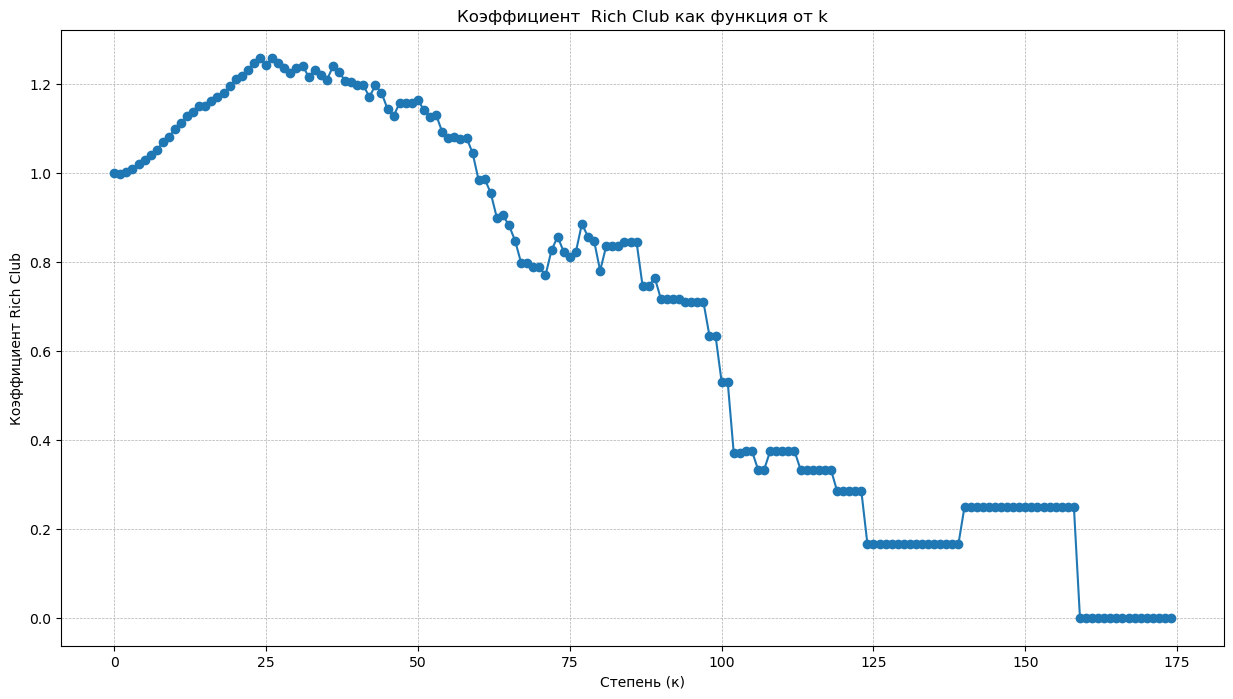

In [65]:
rich_club = nx.rich_club_coefficient(G, normalized=True, Q=100)

plt.figure(figsize=(15, 8))
plt.plot(list(rich_club.keys()), list(rich_club.values()), 'o-')
plt.title('Коэффициент  Rich Club как функция от k')
plt.xlabel('Степень (к)')
plt.ylabel('Коэффициент Rich Club')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## Задание №5:

### (2 балла) Напишите функцию разложения сети по k-core, постройте соответвующее разложение.

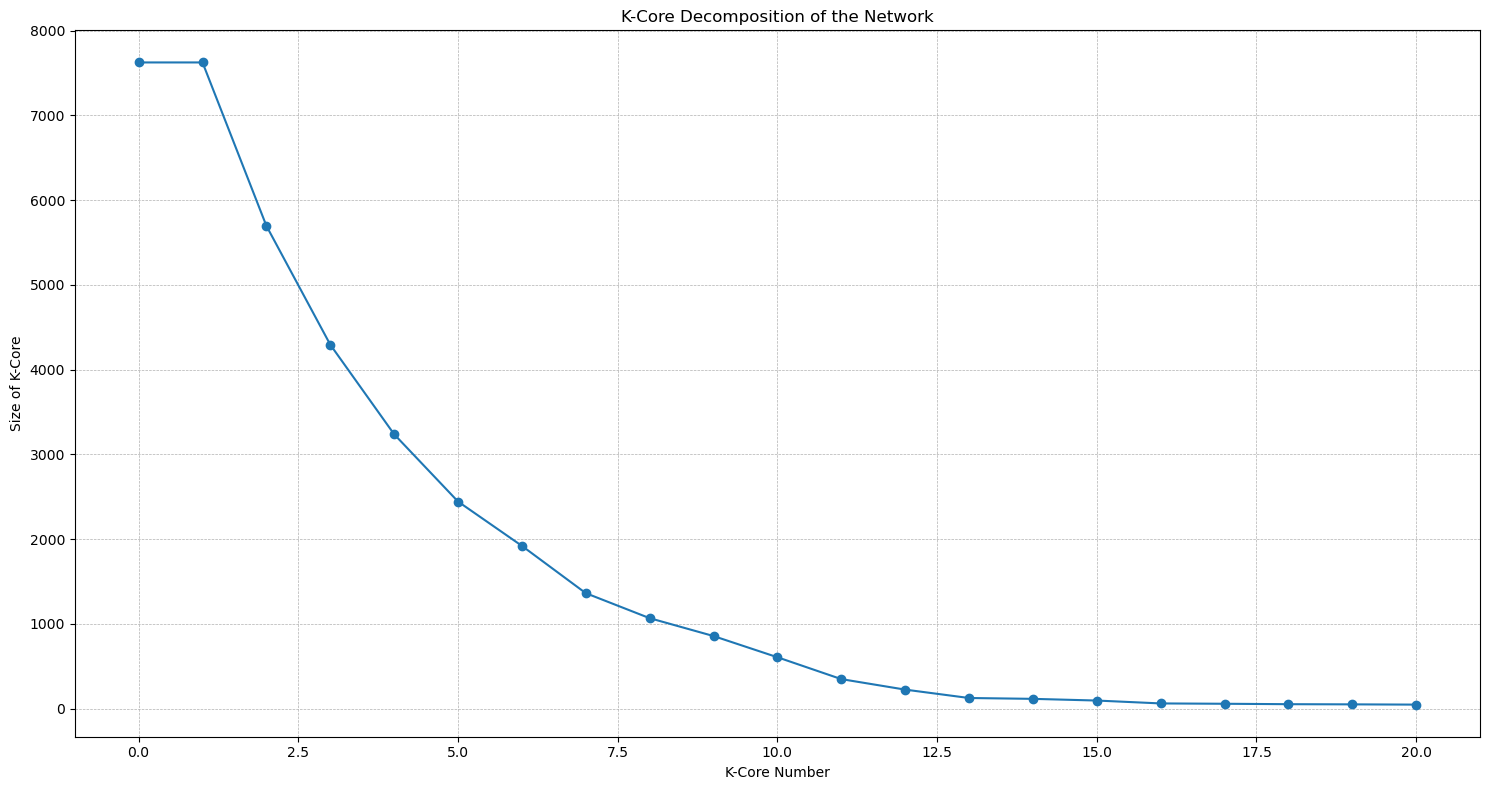

In [66]:
# Вычисление k-core для всех узлов в графе
core_numbers = nx.core_number(G)

# Определение максимального k-core в сети
maximum_k_core = max(core_numbers.values())

# Создание списка размеров k-core
core_sizes = [nx.k_core(G, core).number_of_nodes() for core in range(maximum_k_core + 1)]

k_core_values = list(range(maximum_k_core + 1))

plt.figure(figsize=(15, 8))
plt.plot(k_core_values, core_sizes, marker='o', linestyle='-')
plt.title('K-Core Decomposition of the Network')
plt.xlabel('K-Core Number')
plt.ylabel('Size of K-Core')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Моделирование и рандомизация (7 баллов)

## Задание №1:

### (2 балла) Для выбранной сети подберите параметры моделей Эрдеша-Реньи, Барабаши-Альберта, чтобы совпадали числа вершин и ребер. Постройте соответсвующие случайные сети и определите какая из моделей лучше описывает кластеризацию сети.

In [67]:
# Основные параметры графа G
vertices_count = G.number_of_nodes()
edges_count = G.number_of_edges()

# Расчёт параметров для генерации графов Эрдеша-Реньи и Барабаши-Альберта
probability_er = 2 * edges_count / (vertices_count * (vertices_count - 1))
mean_degree_ba = int(edges_count / vertices_count)

# Генерация графов
erdos_renyi_net = nx.erdos_renyi_graph(vertices_count, probability_er)
barabasi_albert_net = nx.barabasi_albert_graph(vertices_count, mean_degree_ba)

# Вычисление среднего коэффициента кластеризации
clust_coeff_er = nx.average_clustering(erdos_renyi_net)
clust_coeff_ba = nx.average_clustering(barabasi_albert_net)
clust_coeff_orig = nx.average_clustering(G)

print("Средние коэффициенты кластеризации для различных сетей:")
print(f"Исходный граф: {clust_coeff_orig}")
print(f"Граф Эрдёша-Реньи: {clust_coeff_er}")
print(f"Граф Барабаши-Альберта: {clust_coeff_ba}")

Средние коэффициенты кластеризации для различных сетей:
Исходный граф: 0.2194184243270858
Граф Эрдёша-Реньи: 0.000990432379312694
Граф Барабаши-Альберта: 0.007473344143160576


#### Видно, что модель Барабаши-Альберта лучше описывает кластеризацию сети, так как коэффициент кластеризации этой модели ближе к коэффициенту исходной сети.

## Задание №2:

### ( 2 балла) Постройте конфигурационную модель для выбранной сети, выведите число петель и мультиребер в модели. Удалите петли и мультиребра и сравните статистику степеней. Лучше ли конфигурационная модель справляется с описанием кластеризации?

Сравнение коэффициентов кластеризации:
Исходная сеть: 0.2194184243270858
Конфигурационная модель (до очистки): 0.007946687610665963
Конфигурационная модель (после очистки): 0.007675941056194813


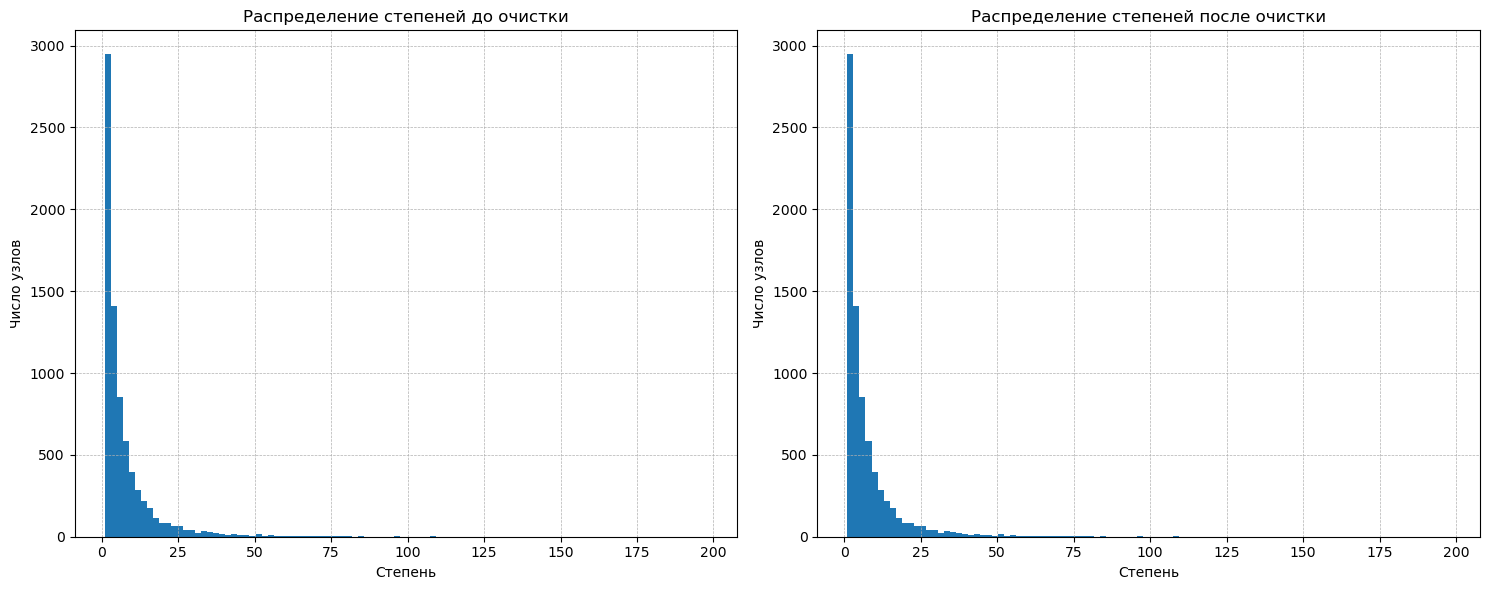

In [72]:
# Последовательность степеней из исходного графа G
degrees_orig = [d for _, d in G.degree()]

# Создание конфигурационной модели на основе степенной последовательности
config_model = nx.configuration_model(degrees_orig)

# Коэффициент кластеризации для исходной сети
clustering_original = nx.average_clustering(G)

# Коэффициент кластеризации для конфигурационной модели до удаления петель и мультирёбер
clustering_cm_before = nx.average_clustering(nx.Graph(config_model))

# Находим и удаляем петли и мультирёбра
loops = list(nx.selfloop_edges(config_model))
multi_edges = [(u, v) for u, v in config_model.edges() if config_model.number_of_edges(u, v) > 1]
config_model.remove_edges_from(loops)
config_model.remove_edges_from(multi_edges)

# Коэффициент кластеризации для конфигурационной модели после удаления петель и мультирёбер
clustering_cm_after = nx.average_clustering(nx.Graph(config_model))

print("Сравнение коэффициентов кластеризации:")
print(f"Исходная сеть: {clustering_original}")
print(f"Конфигурационная модель (до очистки): {clustering_cm_before}")
print(f"Конфигурационная модель (после очистки): {clustering_cm_after}")

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist([degree for _, degree in config_model.degree()], bins=100)
plt.title('Распределение степеней до очистки')
plt.xlabel('Степень')
plt.ylabel('Число узлов')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)
plt.hist([degree for _, degree in nx.Graph(config_model).degree()], bins=100)
plt.title('Распределение степеней после очистки')
plt.xlabel('Степень')
plt.ylabel('Число узлов')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Видно, что коэффициенты кластеризации у конфигурационной модели и у ей упрощённой версии более близкие к коэффициенту исходной сети, чем коэффициенты моделей Эрдеши-Реньи и Барабаша-Альберта.

## Задание №3:

### (2 балла) Напишите функцию, осуществляющую заданное число шагов $Q$ рандомизации. Лучше задавать множителем $f$ от числа ребер в системе, т.е. $f=\frac{Q}{L}$, $L$-число ребер;

In [73]:
from random import sample

def shuffle_graph_edges(graph, factor=1.0):
    total_edges = graph.number_of_edges()
    num_swaps = int(factor * total_edges)  # Количество перестановок

    randomized_graph = graph.copy()
    graph_edges = list(randomized_graph.edges())

    for _ in range(num_swaps):
        edge_one, edge_two = sample(graph_edges, 2)
        # Условие проверяет отсутствие петель и существующих рёбер между выбранными узлами
        if edge_one[0] != edge_two[1] and edge_one[1] != edge_two[0] \
           and not randomized_graph.has_edge(edge_one[0], edge_two[1]) \
           and not randomized_graph.has_edge(edge_one[1], edge_two[0]):
            # Удаляем исходные рёбра
            randomized_graph.remove_edge(*edge_one)
            randomized_graph.remove_edge(*edge_two)
            # Добавляем новые рёбра
            randomized_graph.add_edge(edge_one[0], edge_two[1])
            randomized_graph.add_edge(edge_one[1], edge_two[0])

            # Обновляем список рёбер
            graph_edges.remove(edge_one)
            graph_edges.remove(edge_two)
            graph_edges.append((edge_one[0], edge_two[1]))
            graph_edges.append((edge_one[1], edge_two[0]))
        else:
            # Пропускаем итерацию, если условия не выполнены
            continue

    return randomized_graph

## Задание №4:

### (1 балла) Постройте зависимость средней кластеризации (транзитивности) от числа рандомизиции $f$.

100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


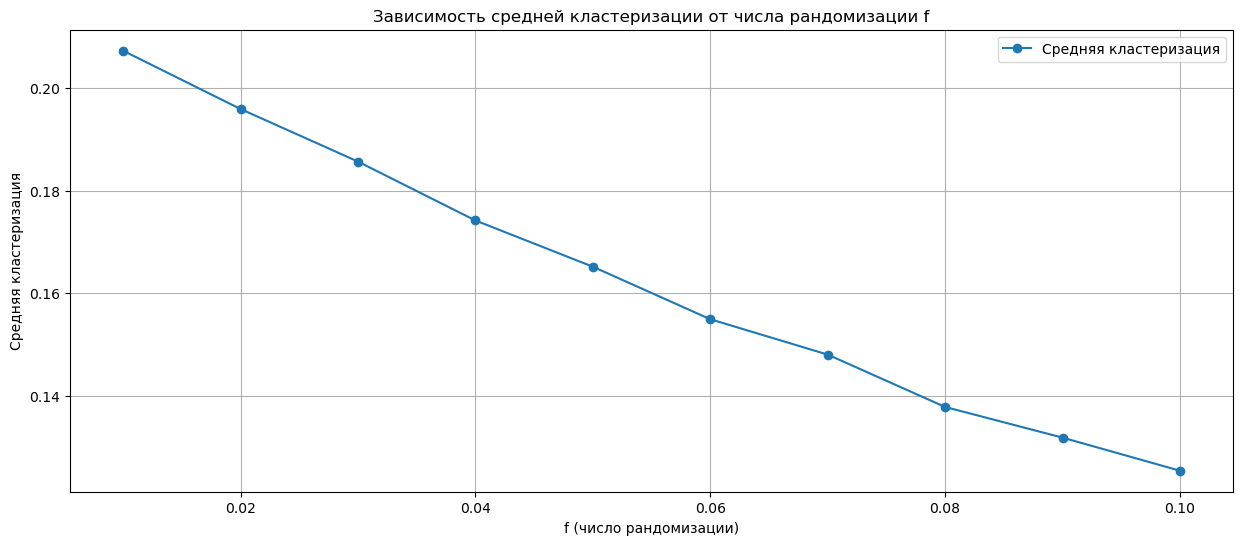

In [75]:
from tqdm import tqdm

# Определение значений f для исследования
f_values = [i * 0.01 for i in range(1, 11)]
# Список для хранения средних значений коэффициента кластеризации
avg_clusterings = []

# Итерация по значениям f с использованием tqdm для отображения прогресса
for f in tqdm(f_values):
    # Рандомизация графа G с заданным коэффициентом f, используя shuffle_graph_edges
    G_rand = shuffle_graph_edges(G, factor=f)
    # Вычисление среднего коэффициента кластеризации для рандомизированного графа
    avg_clustering = nx.average_clustering(G_rand)
    # Добавление вычисленного значения в список
    avg_clusterings.append(avg_clustering)

# График зависимости средней кластеризации от f
plt.figure(figsize=(15, 6))
plt.plot(f_values, avg_clusterings, 'o-', label='Средняя кластеризация')
plt.title('Зависимость средней кластеризации от числа рандомизации f')
plt.xlabel('f (число рандомизации)')
plt.ylabel('Средняя кластеризация')
plt.grid(True)
plt.legend()
plt.show()